# Caltech-UCSD Birds-200-2011 (CUB) - Reader Writer class

## Imports

In [1]:
import numpy as np
import os
import csv
import cv2
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import pprint

## Globals

In [2]:
CUB_PATH = "D:/Google-Drive/Technology/airboat/ML/Birds-DS/CUB_200_2011/CUB_200_2011/CUB_200_2011"
CSV_PATH = "D:/Google-Drive/Technology/airboat/ML/Images/train/birds_labels.csv"
PROCESS_CUB = True

## Helpers

In [3]:
def draw_box(csvData,line):
    selected_value = csvData[csvData.index == line]
    for index, row in selected_value.iterrows():
        img = cv2.imread(row['filename'])
        img = cv2.rectangle(img, (row['xmin'], row['ymin']), (row['xmax'], row['ymax']), (0, 0, 0), 1)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img,row['class'],(row['xmin'],row['ymin']), font, 1,(0,0,0),1)
    return img

def getCsv(csvPath):
    csvData =  pd.read_csv(csvPath)
    #csvData.head()
    return csvData

## CUB to csv class

In [4]:
class CUB_ReadWrite:
    
    def __init__(self,cubPath):
        IMAGES_FILE   = "images.txt"
        BBOX_FILE     = "bounding_boxes.txt"
        IMGCLASS_FILE = "image_class_labels.txt"
        CLASSES_FILE  = "classes.txt"
        
        self.cubPath = cubPath
        self.imgTxtPath = os.path.join(cubPath,IMAGES_FILE)
        self.bbTxtPath = os.path.join(cubPath,BBOX_FILE)
        self.imgClassPath = os.path.join(cubPath,IMGCLASS_FILE)
        self.classesPath = os.path.join(cubPath,CLASSES_FILE)
        self.imgList,self.imgDict,self.imgSizesDict = self._readImgTxt()
        self.bboxDict = self._readBB()
        self.imgClassDict = self._readImgClass()
        self.classesDict = self._readClasses()
        
    def _getImgSize(self,imgPath):
        im = Image.open(imgPath)
        return im.size

    def _readImgTxt(self):
        imgList = []
        imgDict = {}
        imgSizesDict = {}
        with open(self.imgTxtPath) as f:
            spamreader = csv.reader(f, delimiter=' ')
            for row in spamreader:
                imgList.append(int(row[0]))
                imgPath = os.path.join('images',row[1])
                width,height = self._getImgSize(imgPath)
                imgDict[int(row[0])] = imgPath
                imgSizesDict[int(row[0])] = [width,height]
        return imgList,imgDict,imgSizesDict

    def _readBB(self):
        bboxDict = {}
        with open(self.bbTxtPath) as f:
            spamreader = csv.reader(f, delimiter=' ')
            for row in spamreader:
                bboxDict[int(row[0])] = [ int(float(x)) for x in row[1:5] ]
        return bboxDict

    def _readImgClass(self):
        imgClassDict = {}
        with open(self.imgClassPath) as f:
            spamreader = csv.reader(f, delimiter=' ')
            for row in spamreader:
                imgClassDict[int(row[0])] = int(row[1])  #offset by 0 
                #self.train_labels_dict[int(row[0])] = (int(row[1]) -1 )/ 20 #offset by 0 
        return imgClassDict

    def _readClasses(self):
        classDict = {}
        with open(self.classesPath) as f:
            spamreader = csv.reader(f, delimiter=' ')
            for row in spamreader:
                classDict[int(row[0])] = row[1]
        return classDict
    
    def getImages(self):
        return self.imgDict
   
    def getImagesSizes(self):
        return self.imgSizesDict
    
    def getBoxes(self):
        return self.bboxDict
    
    def getImgClasses(self):
        return self.imgClassDict
    
    def getClasses(self):
        return self.classesDict
    
    def getCubSize(self):
        return len(self.imgList)    
    
    def writeCubToCsv(self,csvFilePath):
        with open(csvFilePath, 'w') as csvfile:
            fieldnames = ['filename', 'image-width', 'image-height', 'class', 'xmin', 'ymin', 'xmax', 'ymax', 'centerx', 'centery', 'width', 'height' ]
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()
            for k in self.imgList:
                i = k -1
                #print(i)
                imgPath = os.path.join(self.cubPath, self.imgDict[self.imgList[i]])
                imWidth  = self.imgSizesDict[self.imgList[i]][0]
                imHeight = self.imgSizesDict[self.imgList[i]][1] 
                imgClass = self.classesDict[self.imgClassDict[self.imgList[i]]]
                boxWidth = int(self.bboxDict[self.imgList[i]][2])
                boxHeight = int(self.bboxDict[self.imgList[i]][3])
                xmin = int(self.bboxDict[self.imgList[i]][0])
                ymin = int(self.bboxDict[self.imgList[i]][1])
                xmax = int(self.bboxDict[self.imgList[i]][0] + boxWidth)
                ymax = int(self.bboxDict[self.imgList[i]][1] + boxHeight)
                centerx = int(self.bboxDict[self.imgList[i]][0] + boxWidth / 2)
                centery = int(self.bboxDict[self.imgList[i]][1] + boxHeight / 2)
                writer.writerow({'filename' : imgPath,'image-width' : imWidth, 'image-height' : imHeight,'class' : imgClass,'xmin' : xmin,\
                     'ymin' : ymin,'xmax' : xmax,'ymax' : ymax, 'centerx' : centerx, 'centery' : centery, 'width' : boxWidth, 'height' : boxHeight})
    

## Usage sample
- init class object
 - print CUB data for debug
- write data into csv file
- read CUB csv file
 - debug print 10 lines header
- display sample image (by number) with bounding box and class as title

In [5]:

if (PROCESS_CUB):   # enables reloading the notebook wothout reading the data (csv read only)
    cub = CUB_ReadWrite(CUB_PATH)         # initialize class object cub
    
    # this part is debug print only of the class methods returned data 
    # --------------------------------------------------------------------------------------------------------
    pprint.pprint(cub.getCubSize())       # CUB databse size (int)
    pprint.pprint(cub.getImages())        # images path list (dictionary - {image id : path} )
    pprint.pprint(cub.getImagesSizes())   # images sizes list (dictionary - {image id : [width,height]} )
    pprint.pprint(cub.getImgClasses())    # images class list (dictionary - {image id : class id} )
    pprint.pprint(cub.getBoxes())         # CUB class names (dictionary - {image id : [xmin, ymin, width, height]} )
    pprint.pprint(cub.getClasses())       # CUB class names (dictionary - {class id : class name} )
    
    # -------------------------------------------------------------------------------------------------------
    
    cub.writeCubToCsv(CSV_PATH)           # write to csv file
    
    del(cub)                              # delete cub object
    

11788
{1: 'images\\001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg',
 2: 'images\\001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg',
 3: 'images\\001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg',
 4: 'images\\001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg',
 5: 'images\\001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg',
 6: 'images\\001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg',
 7: 'images\\001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg',
 8: 'images\\001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg',
 9: 'images\\001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg',
 10: 'images\\001.Black_footed_Albatross/Black_Footed_Albatross_0025_796057.jpg',
 11: 'images\\001.Black_footed_Albatross/Black_Footed_Albatross_0023_796059.jpg',
 12: 'images\\001.Black_footed_Albatross/Black_Footed_Albatross_0086_796062.jpg',
 13: 'images\\001.Black_footed_Albatross/Black

 732: 'images\\014.Indigo_Bunting/Indigo_Bunting_0001_12469.jpg',
 733: 'images\\014.Indigo_Bunting/Indigo_Bunting_0066_12869.jpg',
 734: 'images\\014.Indigo_Bunting/Indigo_Bunting_0084_11848.jpg',
 735: 'images\\014.Indigo_Bunting/Indigo_Bunting_0049_13641.jpg',
 736: 'images\\014.Indigo_Bunting/Indigo_Bunting_0059_11596.jpg',
 737: 'images\\014.Indigo_Bunting/Indigo_Bunting_0053_13391.jpg',
 738: 'images\\014.Indigo_Bunting/Indigo_Bunting_0015_12632.jpg',
 739: 'images\\014.Indigo_Bunting/Indigo_Bunting_0016_13661.jpg',
 740: 'images\\014.Indigo_Bunting/Indigo_Bunting_0080_13416.jpg',
 741: 'images\\014.Indigo_Bunting/Indigo_Bunting_0018_11883.jpg',
 742: 'images\\014.Indigo_Bunting/Indigo_Bunting_0073_13933.jpg',
 743: 'images\\014.Indigo_Bunting/Indigo_Bunting_0072_14197.jpg',
 744: 'images\\014.Indigo_Bunting/Indigo_Bunting_0056_12637.jpg',
 745: 'images\\014.Indigo_Bunting/Indigo_Bunting_0071_11639.jpg',
 746: 'images\\014.Indigo_Bunting/Indigo_Bunting_0082_11907.jpg',
 747: 'ima

 1709: 'images\\031.Black_billed_Cuckoo/Black_Billed_Cuckoo_0079_26180.jpg',
 1710: 'images\\031.Black_billed_Cuckoo/Black_Billed_Cuckoo_0051_795318.jpg',
 1711: 'images\\031.Black_billed_Cuckoo/Black_Billed_Cuckoo_0086_26188.jpg',
 1712: 'images\\031.Black_billed_Cuckoo/Black_Billed_Cuckoo_0045_26194.jpg',
 1713: 'images\\031.Black_billed_Cuckoo/Black_Billed_Cuckoo_0065_26203.jpg',
 1714: 'images\\031.Black_billed_Cuckoo/Black_Billed_Cuckoo_0096_26204.jpg',
 1715: 'images\\031.Black_billed_Cuckoo/Black_Billed_Cuckoo_0015_26208.jpg',
 1716: 'images\\031.Black_billed_Cuckoo/Black_Billed_Cuckoo_0081_26209.jpg',
 1717: 'images\\031.Black_billed_Cuckoo/Black_Billed_Cuckoo_0088_26217.jpg',
 1718: 'images\\031.Black_billed_Cuckoo/Black_Billed_Cuckoo_0018_26218.jpg',
 1719: 'images\\031.Black_billed_Cuckoo/Black_Billed_Cuckoo_0017_26221.jpg',
 1720: 'images\\031.Black_billed_Cuckoo/Black_Billed_Cuckoo_0077_26222.jpg',
 1721: 'images\\031.Black_billed_Cuckoo/Black_Billed_Cuckoo_0055_26223.jpg'

 2344: 'images\\041.Scissor_tailed_Flycatcher/Scissor_Tailed_Flycatcher_0088_41700.jpg',
 2345: 'images\\041.Scissor_tailed_Flycatcher/Scissor_Tailed_Flycatcher_0097_41701.jpg',
 2346: 'images\\041.Scissor_tailed_Flycatcher/Scissor_Tailed_Flycatcher_0114_41704.jpg',
 2347: 'images\\041.Scissor_tailed_Flycatcher/Scissor_Tailed_Flycatcher_0092_41767.jpg',
 2348: 'images\\041.Scissor_tailed_Flycatcher/Scissor_Tailed_Flycatcher_0012_41853.jpg',
 2349: 'images\\041.Scissor_tailed_Flycatcher/Scissor_Tailed_Flycatcher_0109_41720.jpg',
 2350: 'images\\041.Scissor_tailed_Flycatcher/Scissor_Tailed_Flycatcher_0005_41727.jpg',
 2351: 'images\\042.Vermilion_Flycatcher/Vermilion_Flycatcher_0019_42241.jpg',
 2352: 'images\\042.Vermilion_Flycatcher/Vermilion_Flycatcher_0020_42498.jpg',
 2353: 'images\\042.Vermilion_Flycatcher/Vermilion_Flycatcher_0069_42502.jpg',
 2354: 'images\\042.Vermilion_Flycatcher/Vermilion_Flycatcher_0025_42248.jpg',
 2355: 'images\\042.Vermilion_Flycatcher/Vermilion_Flycatcher

 3231: 'images\\056.Pine_Grosbeak/Pine_Grosbeak_0053_38805.jpg',
 3232: 'images\\056.Pine_Grosbeak/Pine_Grosbeak_0082_38552.jpg',
 3233: 'images\\056.Pine_Grosbeak/Pine_Grosbeak_0091_38811.jpg',
 3234: 'images\\056.Pine_Grosbeak/Pine_Grosbeak_0088_38830.jpg',
 3235: 'images\\056.Pine_Grosbeak/Pine_Grosbeak_0059_38581.jpg',
 3236: 'images\\056.Pine_Grosbeak/Pine_Grosbeak_0035_38729.jpg',
 3237: 'images\\056.Pine_Grosbeak/Pine_Grosbeak_0115_38330.jpg',
 3238: 'images\\056.Pine_Grosbeak/Pine_Grosbeak_0019_38845.jpg',
 3239: 'images\\056.Pine_Grosbeak/Pine_Grosbeak_0034_38987.jpg',
 3240: 'images\\056.Pine_Grosbeak/Pine_Grosbeak_0033_38945.jpg',
 3241: 'images\\056.Pine_Grosbeak/Pine_Grosbeak_0107_38351.jpg',
 3242: 'images\\056.Pine_Grosbeak/Pine_Grosbeak_0009_38609.jpg',
 3243: 'images\\056.Pine_Grosbeak/Pine_Grosbeak_0075_38619.jpg',
 3244: 'images\\056.Pine_Grosbeak/Pine_Grosbeak_0018_38374.jpg',
 3245: 'images\\056.Pine_Grosbeak/Pine_Grosbeak_0049_38380.jpg',
 3246: 'images\\056.Pine_

 4231: 'images\\073.Blue_Jay/Blue_Jay_0031_62913.jpg',
 4232: 'images\\073.Blue_Jay/Blue_Jay_0078_62351.jpg',
 4233: 'images\\073.Blue_Jay/Blue_Jay_0009_62873.jpg',
 4234: 'images\\073.Blue_Jay/Blue_Jay_0027_63133.jpg',
 4235: 'images\\073.Blue_Jay/Blue_Jay_0079_62626.jpg',
 4236: 'images\\073.Blue_Jay/Blue_Jay_0010_61939.jpg',
 4237: 'images\\073.Blue_Jay/Blue_Jay_0011_63660.jpg',
 4238: 'images\\073.Blue_Jay/Blue_Jay_0061_63645.jpg',
 4239: 'images\\073.Blue_Jay/Blue_Jay_0003_63408.jpg',
 4240: 'images\\073.Blue_Jay/Blue_Jay_0080_61617.jpg',
 4241: 'images\\073.Blue_Jay/Blue_Jay_0099_64435.jpg',
 4242: 'images\\073.Blue_Jay/Blue_Jay_0024_63167.jpg',
 4243: 'images\\073.Blue_Jay/Blue_Jay_0002_62657.jpg',
 4244: 'images\\073.Blue_Jay/Blue_Jay_0070_63684.jpg',
 4245: 'images\\073.Blue_Jay/Blue_Jay_0101_62882.jpg',
 4246: 'images\\073.Blue_Jay/Blue_Jay_0092_61654.jpg',
 4247: 'images\\073.Blue_Jay/Blue_Jay_0076_61817.jpg',
 4248: 'images\\073.Blue_Jay/Blue_Jay_0054_61656.jpg',
 4249: 'im

 5230: 'images\\090.Red_breasted_Merganser/Red_Breasted_Merganser_0040_79207.jpg',
 5231: 'images\\090.Red_breasted_Merganser/Red_Breasted_Merganser_0062_79548.jpg',
 5232: 'images\\090.Red_breasted_Merganser/Red_Breasted_Merganser_0082_79214.jpg',
 5233: 'images\\090.Red_breasted_Merganser/Red_Breasted_Merganser_0006_79216.jpg',
 5234: 'images\\090.Red_breasted_Merganser/Red_Breasted_Merganser_0051_79474.jpg',
 5235: 'images\\090.Red_breasted_Merganser/Red_Breasted_Merganser_0016_79476.jpg',
 5236: 'images\\090.Red_breasted_Merganser/Red_Breasted_Merganser_0023_79477.jpg',
 5237: 'images\\090.Red_breasted_Merganser/Red_Breasted_Merganser_0017_79224.jpg',
 5238: 'images\\090.Red_breasted_Merganser/Red_Breasted_Merganser_0024_79483.jpg',
 5239: 'images\\090.Red_breasted_Merganser/Red_Breasted_Merganser_0047_79486.jpg',
 5240: 'images\\090.Red_breasted_Merganser/Red_Breasted_Merganser_0004_79232.jpg',
 5241: 'images\\090.Red_breasted_Merganser/Red_Breasted_Merganser_0063_79238.jpg',
 524

 6230: 'images\\107.Common_Raven/Common_Raven_0017_102044.jpg',
 6231: 'images\\107.Common_Raven/Common_Raven_0132_101543.jpg',
 6232: 'images\\107.Common_Raven/Common_Raven_0093_102058.jpg',
 6233: 'images\\107.Common_Raven/Common_Raven_0002_102582.jpg',
 6234: 'images\\107.Common_Raven/Common_Raven_0025_102584.jpg',
 6235: 'images\\107.Common_Raven/Common_Raven_0074_101576.jpg',
 6236: 'images\\107.Common_Raven/Common_Raven_0129_102094.jpg',
 6237: 'images\\107.Common_Raven/Common_Raven_0119_101595.jpg',
 6238: 'images\\107.Common_Raven/Common_Raven_0009_102112.jpg',
 6239: 'images\\107.Common_Raven/Common_Raven_0037_101096.jpg',
 6240: 'images\\107.Common_Raven/Common_Raven_0079_101100.jpg',
 6241: 'images\\107.Common_Raven/Common_Raven_0128_102017.jpg',
 6242: 'images\\107.Common_Raven/Common_Raven_0078_101148.jpg',
 6243: 'images\\107.Common_Raven/Common_Raven_0099_102534.jpg',
 6244: 'images\\107.Common_Raven/Common_Raven_0122_101708.jpg',
 6245: 'images\\107.Common_Raven/Common_

 7230: 'images\\124.Le_Conte_Sparrow/Le_Conte_Sparrow_0068_795180.jpg',
 7231: 'images\\124.Le_Conte_Sparrow/Le_Conte_Sparrow_0058_795181.jpg',
 7232: 'images\\124.Le_Conte_Sparrow/Le_Conte_Sparrow_0099_795182.jpg',
 7233: 'images\\124.Le_Conte_Sparrow/Le_Conte_Sparrow_0097_795183.jpg',
 7234: 'images\\124.Le_Conte_Sparrow/Le_Conte_Sparrow_0071_795185.jpg',
 7235: 'images\\124.Le_Conte_Sparrow/Le_Conte_Sparrow_0032_795186.jpg',
 7236: 'images\\124.Le_Conte_Sparrow/Le_Conte_Sparrow_0053_795187.jpg',
 7237: 'images\\124.Le_Conte_Sparrow/Le_Conte_Sparrow_0025_795188.jpg',
 7238: 'images\\124.Le_Conte_Sparrow/Le_Conte_Sparrow_0084_795189.jpg',
 7239: 'images\\124.Le_Conte_Sparrow/Le_Conte_Sparrow_0024_795190.jpg',
 7240: 'images\\124.Le_Conte_Sparrow/Le_Conte_Sparrow_0047_795192.jpg',
 7241: 'images\\124.Le_Conte_Sparrow/Le_Conte_Sparrow_0061_795194.jpg',
 7242: 'images\\124.Le_Conte_Sparrow/Le_Conte_Sparrow_0102_795195.jpg',
 7243: 'images\\124.Le_Conte_Sparrow/Le_Conte_Sparrow_0078_11705

 8230: 'images\\141.Artic_Tern/Artic_Tern_0092_141849.jpg',
 8231: 'images\\141.Artic_Tern/Artic_Tern_0056_141858.jpg',
 8232: 'images\\141.Artic_Tern/Artic_Tern_0048_142372.jpg',
 8233: 'images\\141.Artic_Tern/Artic_Tern_0012_143410.jpg',
 8234: 'images\\141.Artic_Tern/Artic_Tern_0059_141876.jpg',
 8235: 'images\\141.Artic_Tern/Artic_Tern_0093_141880.jpg',
 8236: 'images\\141.Artic_Tern/Artic_Tern_0112_141893.jpg',
 8237: 'images\\141.Artic_Tern/Artic_Tern_0039_141390.jpg',
 8238: 'images\\141.Artic_Tern/Artic_Tern_0129_141395.jpg',
 8239: 'images\\141.Artic_Tern/Artic_Tern_0050_140887.jpg',
 8240: 'images\\141.Artic_Tern/Artic_Tern_0080_140889.jpg',
 8241: 'images\\141.Artic_Tern/Artic_Tern_0026_141839.jpg',
 8242: 'images\\141.Artic_Tern/Artic_Tern_0019_141922.jpg',
 8243: 'images\\141.Artic_Tern/Artic_Tern_0127_142440.jpg',
 8244: 'images\\141.Artic_Tern/Artic_Tern_0036_142447.jpg',
 8245: 'images\\141.Artic_Tern/Artic_Tern_0021_143477.jpg',
 8246: 'images\\141.Artic_Tern/Artic_Ter

 9229: 'images\\157.Yellow_throated_Vireo/Yellow_Throated_Vireo_0071_159707.jpg',
 9230: 'images\\157.Yellow_throated_Vireo/Yellow_Throated_Vireo_0014_159709.jpg',
 9231: 'images\\157.Yellow_throated_Vireo/Yellow_Throated_Vireo_0031_159712.jpg',
 9232: 'images\\158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0026_159744.jpg',
 9233: 'images\\158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0080_159749.jpg',
 9234: 'images\\158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0099_159753.jpg',
 9235: 'images\\158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0055_159740.jpg',
 9236: 'images\\158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0093_159764.jpg',
 9237: 'images\\158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0062_159783.jpg',
 9238: 'images\\158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0013_159787.jpg',
 9239: 'images\\158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0032_797150.jpg',
 9240: 'images\\158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0057_159818.jpg',
 9241: 'images\\158.Bay_breasted_W

 10229: 'images\\174.Palm_Warbler/Palm_Warbler_0044_169319.jpg',
 10230: 'images\\174.Palm_Warbler/Palm_Warbler_0012_170857.jpg',
 10231: 'images\\174.Palm_Warbler/Palm_Warbler_0034_170352.jpg',
 10232: 'images\\174.Palm_Warbler/Palm_Warbler_0096_170867.jpg',
 10233: 'images\\174.Palm_Warbler/Palm_Warbler_0102_168829.jpg',
 10234: 'images\\174.Palm_Warbler/Palm_Warbler_0047_169354.jpg',
 10235: 'images\\174.Palm_Warbler/Palm_Warbler_0039_170894.jpg',
 10236: 'images\\174.Palm_Warbler/Palm_Warbler_0020_168857.jpg',
 10237: 'images\\174.Palm_Warbler/Palm_Warbler_0049_169885.jpg',
 10238: 'images\\174.Palm_Warbler/Palm_Warbler_0105_170429.jpg',
 10239: 'images\\174.Palm_Warbler/Palm_Warbler_0005_169918.jpg',
 10240: 'images\\174.Palm_Warbler/Palm_Warbler_0040_169922.jpg',
 10241: 'images\\174.Palm_Warbler/Palm_Warbler_0013_169411.jpg',
 10242: 'images\\174.Palm_Warbler/Palm_Warbler_0108_169426.jpg',
 10243: 'images\\174.Palm_Warbler/Palm_Warbler_0006_169429.jpg',
 10244: 'images\\174.Palm

 11229: 'images\\191.Red_headed_Woodpecker/Red_Headed_Woodpecker_0052_182702.jpg',
 11230: 'images\\191.Red_headed_Woodpecker/Red_Headed_Woodpecker_0067_183710.jpg',
 11231: 'images\\191.Red_headed_Woodpecker/Red_Headed_Woodpecker_0032_182815.jpg',
 11232: 'images\\191.Red_headed_Woodpecker/Red_Headed_Woodpecker_0013_182721.jpg',
 11233: 'images\\191.Red_headed_Woodpecker/Red_Headed_Woodpecker_0057_183234.jpg',
 11234: 'images\\191.Red_headed_Woodpecker/Red_Headed_Woodpecker_0051_182724.jpg',
 11235: 'images\\191.Red_headed_Woodpecker/Red_Headed_Woodpecker_0005_183414.jpg',
 11236: 'images\\191.Red_headed_Woodpecker/Red_Headed_Woodpecker_0007_182728.jpg',
 11237: 'images\\191.Red_headed_Woodpecker/Red_Headed_Woodpecker_0098_182732.jpg',
 11238: 'images\\191.Red_headed_Woodpecker/Red_Headed_Woodpecker_0088_183246.jpg',
 11239: 'images\\191.Red_headed_Woodpecker/Red_Headed_Woodpecker_0085_182703.jpg',
 11240: 'images\\191.Red_headed_Woodpecker/Red_Headed_Woodpecker_0055_183515.jpg',
 112

 190: [500, 334],
 191: [500, 375],
 192: [453, 500],
 193: [333, 500],
 194: [500, 375],
 195: [500, 375],
 196: [500, 332],
 197: [500, 333],
 198: [500, 416],
 199: [418, 500],
 200: [500, 444],
 201: [500, 333],
 202: [400, 500],
 203: [420, 280],
 204: [500, 344],
 205: [500, 478],
 206: [500, 360],
 207: [500, 367],
 208: [500, 375],
 209: [479, 500],
 210: [500, 375],
 211: [357, 500],
 212: [500, 337],
 213: [500, 349],
 214: [444, 500],
 215: [308, 500],
 216: [500, 335],
 217: [500, 374],
 218: [500, 375],
 219: [400, 500],
 220: [500, 333],
 221: [500, 332],
 222: [500, 392],
 223: [500, 375],
 224: [500, 383],
 225: [500, 375],
 226: [375, 500],
 227: [500, 333],
 228: [397, 500],
 229: [347, 500],
 230: [500, 333],
 231: [500, 375],
 232: [333, 500],
 233: [500, 375],
 234: [500, 398],
 235: [500, 375],
 236: [500, 477],
 237: [343, 367],
 238: [500, 378],
 239: [500, 400],
 240: [348, 500],
 241: [334, 500],
 242: [333, 500],
 243: [334, 500],
 244: [300, 254],
 245: [326

 1190: [350, 295],
 1191: [350, 247],
 1192: [500, 360],
 1193: [500, 343],
 1194: [418, 500],
 1195: [230, 155],
 1196: [404, 271],
 1197: [380, 253],
 1198: [500, 333],
 1199: [377, 250],
 1200: [500, 403],
 1201: [500, 333],
 1202: [500, 332],
 1203: [500, 332],
 1204: [500, 276],
 1205: [500, 370],
 1206: [500, 330],
 1207: [429, 290],
 1208: [350, 340],
 1209: [500, 406],
 1210: [500, 382],
 1211: [500, 320],
 1212: [350, 444],
 1213: [500, 334],
 1214: [450, 319],
 1215: [500, 334],
 1216: [500, 333],
 1217: [359, 296],
 1218: [500, 410],
 1219: [376, 325],
 1220: [500, 402],
 1221: [500, 435],
 1222: [500, 382],
 1223: [500, 375],
 1224: [500, 333],
 1225: [480, 348],
 1226: [357, 500],
 1227: [500, 375],
 1228: [500, 347],
 1229: [500, 375],
 1230: [500, 308],
 1231: [500, 323],
 1232: [500, 333],
 1233: [500, 333],
 1234: [500, 375],
 1235: [500, 441],
 1236: [331, 500],
 1237: [500, 310],
 1238: [500, 333],
 1239: [500, 337],
 1240: [500, 334],
 1241: [500, 379],
 1242: [500,

 2190: [500, 470],
 2191: [500, 395],
 2192: [500, 462],
 2193: [500, 419],
 2194: [500, 458],
 2195: [500, 456],
 2196: [500, 498],
 2197: [500, 357],
 2198: [329, 500],
 2199: [500, 333],
 2200: [500, 375],
 2201: [500, 470],
 2202: [500, 334],
 2203: [500, 334],
 2204: [500, 400],
 2205: [500, 357],
 2206: [500, 338],
 2207: [388, 500],
 2208: [375, 500],
 2209: [500, 459],
 2210: [500, 358],
 2211: [500, 361],
 2212: [333, 500],
 2213: [401, 500],
 2214: [500, 357],
 2215: [500, 428],
 2216: [401, 500],
 2217: [500, 400],
 2218: [487, 500],
 2219: [500, 375],
 2220: [500, 363],
 2221: [500, 496],
 2222: [500, 444],
 2223: [397, 500],
 2224: [500, 499],
 2225: [483, 500],
 2226: [500, 375],
 2227: [500, 357],
 2228: [500, 350],
 2229: [500, 277],
 2230: [400, 500],
 2231: [396, 478],
 2232: [500, 375],
 2233: [432, 473],
 2234: [487, 500],
 2235: [403, 500],
 2236: [329, 500],
 2237: [375, 500],
 2238: [374, 500],
 2239: [375, 500],
 2240: [399, 500],
 2241: [496, 500],
 2242: [500,

 3439: [500, 333],
 3440: [474, 480],
 3441: [500, 332],
 3442: [500, 375],
 3443: [500, 331],
 3444: [500, 400],
 3445: [338, 500],
 3446: [500, 332],
 3447: [500, 430],
 3448: [420, 280],
 3449: [500, 475],
 3450: [500, 333],
 3451: [500, 356],
 3452: [500, 396],
 3453: [500, 333],
 3454: [430, 500],
 3455: [500, 352],
 3456: [390, 500],
 3457: [500, 333],
 3458: [333, 500],
 3459: [500, 400],
 3460: [500, 375],
 3461: [500, 375],
 3462: [500, 376],
 3463: [500, 333],
 3464: [500, 333],
 3465: [500, 334],
 3466: [500, 500],
 3467: [500, 333],
 3468: [330, 220],
 3469: [500, 383],
 3470: [500, 333],
 3471: [500, 440],
 3472: [435, 500],
 3473: [500, 375],
 3474: [500, 333],
 3475: [500, 375],
 3476: [500, 336],
 3477: [500, 375],
 3478: [500, 333],
 3479: [500, 375],
 3480: [500, 333],
 3481: [500, 335],
 3482: [500, 406],
 3483: [500, 375],
 3484: [500, 375],
 3485: [375, 500],
 3486: [500, 373],
 3487: [500, 435],
 3488: [500, 332],
 3489: [500, 375],
 3490: [500, 333],
 3491: [500,

 4439: [375, 500],
 4440: [500, 357],
 4441: [500, 334],
 4442: [364, 500],
 4443: [500, 362],
 4444: [375, 500],
 4445: [500, 372],
 4446: [500, 402],
 4447: [500, 379],
 4448: [500, 375],
 4449: [333, 500],
 4450: [333, 500],
 4451: [408, 500],
 4452: [500, 334],
 4453: [500, 498],
 4454: [333, 500],
 4455: [500, 375],
 4456: [463, 500],
 4457: [500, 456],
 4458: [500, 496],
 4459: [344, 500],
 4460: [500, 358],
 4461: [500, 375],
 4462: [500, 375],
 4463: [500, 311],
 4464: [500, 375],
 4465: [500, 472],
 4466: [500, 375],
 4467: [445, 500],
 4468: [500, 405],
 4469: [500, 333],
 4470: [375, 500],
 4471: [253, 500],
 4472: [500, 400],
 4473: [500, 376],
 4474: [500, 375],
 4475: [470, 470],
 4476: [500, 375],
 4477: [500, 334],
 4478: [400, 500],
 4479: [500, 363],
 4480: [500, 409],
 4481: [450, 401],
 4482: [500, 333],
 4483: [500, 489],
 4484: [400, 500],
 4485: [500, 333],
 4486: [500, 333],
 4487: [500, 486],
 4488: [500, 333],
 4489: [500, 333],
 4490: [500, 420],
 4491: [333,

 5439: [494, 500],
 5440: [500, 500],
 5441: [500, 333],
 5442: [500, 398],
 5443: [500, 303],
 5444: [500, 375],
 5445: [500, 456],
 5446: [400, 500],
 5447: [500, 273],
 5448: [500, 400],
 5449: [500, 482],
 5450: [400, 500],
 5451: [500, 333],
 5452: [500, 333],
 5453: [500, 487],
 5454: [500, 375],
 5455: [402, 500],
 5456: [500, 375],
 5457: [400, 500],
 5458: [500, 471],
 5459: [500, 334],
 5460: [500, 375],
 5461: [500, 333],
 5462: [500, 375],
 5463: [500, 335],
 5464: [500, 495],
 5465: [375, 500],
 5466: [500, 312],
 5467: [500, 393],
 5468: [400, 500],
 5469: [500, 333],
 5470: [402, 259],
 5471: [499, 500],
 5472: [500, 362],
 5473: [500, 333],
 5474: [500, 375],
 5475: [500, 375],
 5476: [308, 500],
 5477: [500, 345],
 5478: [500, 333],
 5479: [500, 375],
 5480: [500, 429],
 5481: [500, 333],
 5482: [500, 333],
 5483: [500, 417],
 5484: [500, 387],
 5485: [500, 332],
 5486: [500, 375],
 5487: [409, 500],
 5488: [500, 357],
 5489: [500, 341],
 5490: [500, 259],
 5491: [333,

 6439: [388, 500],
 6440: [500, 400],
 6441: [500, 333],
 6442: [500, 333],
 6443: [500, 355],
 6444: [500, 409],
 6445: [500, 400],
 6446: [500, 400],
 6447: [473, 450],
 6448: [500, 428],
 6449: [333, 500],
 6450: [500, 379],
 6451: [500, 333],
 6452: [500, 387],
 6453: [500, 409],
 6454: [500, 397],
 6455: [420, 280],
 6456: [500, 375],
 6457: [500, 333],
 6458: [500, 333],
 6459: [406, 500],
 6460: [500, 426],
 6461: [357, 500],
 6462: [500, 375],
 6463: [365, 500],
 6464: [500, 434],
 6465: [335, 500],
 6466: [500, 401],
 6467: [500, 500],
 6468: [500, 400],
 6469: [500, 400],
 6470: [500, 313],
 6471: [500, 375],
 6472: [357, 500],
 6473: [333, 500],
 6474: [500, 333],
 6475: [500, 395],
 6476: [500, 375],
 6477: [422, 500],
 6478: [500, 326],
 6479: [400, 500],
 6480: [500, 334],
 6481: [500, 400],
 6482: [500, 333],
 6483: [500, 335],
 6484: [324, 432],
 6485: [500, 364],
 6486: [500, 289],
 6487: [357, 500],
 6488: [500, 332],
 6489: [500, 482],
 6490: [500, 398],
 6491: [500,

 7438: [500, 375],
 7439: [500, 375],
 7440: [500, 379],
 7441: [386, 500],
 7442: [500, 375],
 7443: [500, 375],
 7444: [500, 375],
 7445: [500, 333],
 7446: [384, 500],
 7447: [333, 500],
 7448: [446, 408],
 7449: [375, 500],
 7450: [381, 500],
 7451: [500, 333],
 7452: [333, 500],
 7453: [500, 332],
 7454: [500, 332],
 7455: [333, 500],
 7456: [450, 295],
 7457: [336, 500],
 7458: [500, 345],
 7459: [328, 500],
 7460: [500, 332],
 7461: [420, 315],
 7462: [230, 307],
 7463: [500, 332],
 7464: [500, 500],
 7465: [500, 400],
 7466: [250, 310],
 7467: [500, 400],
 7468: [333, 500],
 7469: [500, 341],
 7470: [500, 200],
 7471: [418, 500],
 7472: [450, 305],
 7473: [500, 200],
 7474: [332, 500],
 7475: [334, 500],
 7476: [500, 375],
 7477: [332, 500],
 7478: [500, 401],
 7479: [386, 500],
 7480: [500, 474],
 7481: [500, 375],
 7482: [357, 500],
 7483: [500, 375],
 7484: [500, 438],
 7485: [400, 500],
 7486: [500, 333],
 7487: [500, 424],
 7488: [337, 500],
 7489: [500, 375],
 7490: [500,

 8188: [375, 500],
 8189: [500, 375],
 8190: [333, 500],
 8191: [500, 333],
 8192: [500, 432],
 8193: [500, 500],
 8194: [500, 333],
 8195: [500, 333],
 8196: [468, 500],
 8197: [386, 500],
 8198: [500, 337],
 8199: [500, 411],
 8200: [500, 432],
 8201: [500, 376],
 8202: [496, 340],
 8203: [500, 339],
 8204: [500, 391],
 8205: [488, 500],
 8206: [500, 375],
 8207: [500, 333],
 8208: [500, 405],
 8209: [466, 500],
 8210: [391, 500],
 8211: [500, 485],
 8212: [500, 333],
 8213: [500, 385],
 8214: [362, 500],
 8215: [500, 333],
 8216: [500, 459],
 8217: [500, 333],
 8218: [327, 500],
 8219: [500, 369],
 8220: [500, 348],
 8221: [357, 500],
 8222: [500, 379],
 8223: [500, 375],
 8224: [500, 405],
 8225: [500, 340],
 8226: [500, 333],
 8227: [500, 333],
 8228: [500, 334],
 8229: [500, 333],
 8230: [405, 500],
 8231: [500, 333],
 8232: [500, 332],
 8233: [180, 218],
 8234: [388, 500],
 8235: [500, 375],
 8236: [470, 500],
 8237: [500, 333],
 8238: [500, 362],
 8239: [500, 403],
 8240: [500,

 9188: [500, 364],
 9189: [500, 400],
 9190: [320, 254],
 9191: [500, 357],
 9192: [500, 404],
 9193: [300, 325],
 9194: [320, 224],
 9195: [450, 344],
 9196: [325, 266],
 9197: [240, 185],
 9198: [500, 333],
 9199: [500, 398],
 9200: [500, 427],
 9201: [375, 500],
 9202: [500, 332],
 9203: [500, 370],
 9204: [500, 386],
 9205: [350, 350],
 9206: [400, 373],
 9207: [500, 333],
 9208: [500, 333],
 9209: [500, 385],
 9210: [500, 335],
 9211: [400, 299],
 9212: [500, 316],
 9213: [500, 474],
 9214: [413, 500],
 9215: [500, 348],
 9216: [500, 372],
 9217: [500, 358],
 9218: [500, 333],
 9219: [500, 312],
 9220: [500, 390],
 9221: [500, 396],
 9222: [500, 366],
 9223: [413, 500],
 9224: [500, 365],
 9225: [500, 375],
 9226: [500, 352],
 9227: [500, 384],
 9228: [500, 490],
 9229: [500, 349],
 9230: [382, 500],
 9231: [500, 333],
 9232: [500, 333],
 9233: [500, 334],
 9234: [500, 500],
 9235: [500, 333],
 9236: [500, 400],
 9237: [500, 333],
 9238: [500, 372],
 9239: [500, 333],
 9240: [500,

 10188: [395, 500],
 10189: [500, 375],
 10190: [500, 415],
 10191: [500, 330],
 10192: [500, 375],
 10193: [500, 373],
 10194: [420, 280],
 10195: [500, 417],
 10196: [500, 400],
 10197: [500, 400],
 10198: [500, 500],
 10199: [500, 375],
 10200: [500, 333],
 10201: [500, 435],
 10202: [500, 388],
 10203: [500, 400],
 10204: [500, 371],
 10205: [500, 333],
 10206: [500, 456],
 10207: [500, 407],
 10208: [500, 335],
 10209: [500, 334],
 10210: [500, 375],
 10211: [500, 343],
 10212: [500, 356],
 10213: [500, 378],
 10214: [500, 400],
 10215: [500, 379],
 10216: [500, 488],
 10217: [500, 400],
 10218: [500, 333],
 10219: [500, 330],
 10220: [500, 333],
 10221: [500, 400],
 10222: [341, 500],
 10223: [500, 333],
 10224: [500, 333],
 10225: [476, 500],
 10226: [500, 313],
 10227: [500, 375],
 10228: [500, 412],
 10229: [500, 391],
 10230: [396, 500],
 10231: [500, 335],
 10232: [500, 357],
 10233: [500, 333],
 10234: [441, 500],
 10235: [500, 313],
 10236: [500, 333],
 10237: [500, 333],


 11187: [250, 374],
 11188: [500, 340],
 11189: [400, 500],
 11190: [500, 400],
 11191: [500, 333],
 11192: [500, 486],
 11193: [500, 358],
 11194: [333, 500],
 11195: [424, 500],
 11196: [500, 312],
 11197: [376, 500],
 11198: [435, 500],
 11199: [500, 352],
 11200: [500, 334],
 11201: [500, 433],
 11202: [354, 500],
 11203: [335, 500],
 11204: [500, 400],
 11205: [500, 359],
 11206: [500, 334],
 11207: [334, 500],
 11208: [500, 375],
 11209: [484, 500],
 11210: [500, 393],
 11211: [391, 480],
 11212: [500, 378],
 11213: [399, 500],
 11214: [500, 413],
 11215: [333, 500],
 11216: [500, 375],
 11217: [357, 500],
 11218: [335, 500],
 11219: [370, 500],
 11220: [279, 500],
 11221: [500, 421],
 11222: [372, 500],
 11223: [381, 500],
 11224: [500, 353],
 11225: [500, 332],
 11226: [333, 500],
 11227: [500, 350],
 11228: [464, 397],
 11229: [500, 375],
 11230: [378, 500],
 11231: [500, 375],
 11232: [335, 500],
 11233: [500, 334],
 11234: [254, 356],
 11235: [386, 500],
 11236: [500, 400],


 149: 3,
 150: 3,
 151: 3,
 152: 3,
 153: 3,
 154: 3,
 155: 3,
 156: 3,
 157: 3,
 158: 3,
 159: 3,
 160: 3,
 161: 3,
 162: 3,
 163: 3,
 164: 3,
 165: 3,
 166: 3,
 167: 3,
 168: 3,
 169: 3,
 170: 3,
 171: 3,
 172: 3,
 173: 3,
 174: 3,
 175: 3,
 176: 3,
 177: 3,
 178: 3,
 179: 4,
 180: 4,
 181: 4,
 182: 4,
 183: 4,
 184: 4,
 185: 4,
 186: 4,
 187: 4,
 188: 4,
 189: 4,
 190: 4,
 191: 4,
 192: 4,
 193: 4,
 194: 4,
 195: 4,
 196: 4,
 197: 4,
 198: 4,
 199: 4,
 200: 4,
 201: 4,
 202: 4,
 203: 4,
 204: 4,
 205: 4,
 206: 4,
 207: 4,
 208: 4,
 209: 4,
 210: 4,
 211: 4,
 212: 4,
 213: 4,
 214: 4,
 215: 4,
 216: 4,
 217: 4,
 218: 4,
 219: 4,
 220: 4,
 221: 4,
 222: 4,
 223: 4,
 224: 4,
 225: 4,
 226: 4,
 227: 4,
 228: 4,
 229: 4,
 230: 4,
 231: 4,
 232: 4,
 233: 4,
 234: 4,
 235: 4,
 236: 4,
 237: 4,
 238: 4,
 239: 5,
 240: 5,
 241: 5,
 242: 5,
 243: 5,
 244: 5,
 245: 5,
 246: 5,
 247: 5,
 248: 5,
 249: 5,
 250: 5,
 251: 5,
 252: 5,
 253: 5,
 254: 5,
 255: 5,
 256: 5,
 257: 5,
 258: 5,
 259: 5,
 

 1148: 21,
 1149: 21,
 1150: 21,
 1151: 21,
 1152: 21,
 1153: 21,
 1154: 21,
 1155: 21,
 1156: 21,
 1157: 21,
 1158: 21,
 1159: 21,
 1160: 21,
 1161: 21,
 1162: 21,
 1163: 21,
 1164: 21,
 1165: 21,
 1166: 21,
 1167: 21,
 1168: 21,
 1169: 21,
 1170: 21,
 1171: 21,
 1172: 21,
 1173: 21,
 1174: 21,
 1175: 21,
 1176: 22,
 1177: 22,
 1178: 22,
 1179: 22,
 1180: 22,
 1181: 22,
 1182: 22,
 1183: 22,
 1184: 22,
 1185: 22,
 1186: 22,
 1187: 22,
 1188: 22,
 1189: 22,
 1190: 22,
 1191: 22,
 1192: 22,
 1193: 22,
 1194: 22,
 1195: 22,
 1196: 22,
 1197: 22,
 1198: 22,
 1199: 22,
 1200: 22,
 1201: 22,
 1202: 22,
 1203: 22,
 1204: 22,
 1205: 22,
 1206: 22,
 1207: 22,
 1208: 22,
 1209: 22,
 1210: 22,
 1211: 22,
 1212: 22,
 1213: 22,
 1214: 22,
 1215: 22,
 1216: 22,
 1217: 22,
 1218: 22,
 1219: 22,
 1220: 22,
 1221: 22,
 1222: 22,
 1223: 22,
 1224: 22,
 1225: 22,
 1226: 22,
 1227: 22,
 1228: 22,
 1229: 22,
 1230: 22,
 1231: 22,
 1232: 23,
 1233: 23,
 1234: 23,
 1235: 23,
 1236: 23,
 1237: 23,
 1238: 23,

 2148: 38,
 2149: 38,
 2150: 38,
 2151: 38,
 2152: 38,
 2153: 38,
 2154: 38,
 2155: 38,
 2156: 38,
 2157: 38,
 2158: 38,
 2159: 38,
 2160: 38,
 2161: 38,
 2162: 38,
 2163: 38,
 2164: 38,
 2165: 38,
 2166: 38,
 2167: 38,
 2168: 38,
 2169: 38,
 2170: 38,
 2171: 38,
 2172: 39,
 2173: 39,
 2174: 39,
 2175: 39,
 2176: 39,
 2177: 39,
 2178: 39,
 2179: 39,
 2180: 39,
 2181: 39,
 2182: 39,
 2183: 39,
 2184: 39,
 2185: 39,
 2186: 39,
 2187: 39,
 2188: 39,
 2189: 39,
 2190: 39,
 2191: 39,
 2192: 39,
 2193: 39,
 2194: 39,
 2195: 39,
 2196: 39,
 2197: 39,
 2198: 39,
 2199: 39,
 2200: 39,
 2201: 39,
 2202: 39,
 2203: 39,
 2204: 39,
 2205: 39,
 2206: 39,
 2207: 39,
 2208: 39,
 2209: 39,
 2210: 39,
 2211: 39,
 2212: 39,
 2213: 39,
 2214: 39,
 2215: 39,
 2216: 39,
 2217: 39,
 2218: 39,
 2219: 39,
 2220: 39,
 2221: 39,
 2222: 39,
 2223: 39,
 2224: 39,
 2225: 39,
 2226: 39,
 2227: 39,
 2228: 39,
 2229: 39,
 2230: 39,
 2231: 40,
 2232: 40,
 2233: 40,
 2234: 40,
 2235: 40,
 2236: 40,
 2237: 40,
 2238: 40,

 3148: 55,
 3149: 55,
 3150: 55,
 3151: 55,
 3152: 55,
 3153: 55,
 3154: 55,
 3155: 55,
 3156: 55,
 3157: 55,
 3158: 55,
 3159: 55,
 3160: 55,
 3161: 55,
 3162: 55,
 3163: 55,
 3164: 55,
 3165: 55,
 3166: 55,
 3167: 55,
 3168: 55,
 3169: 55,
 3170: 55,
 3171: 55,
 3172: 55,
 3173: 55,
 3174: 55,
 3175: 55,
 3176: 55,
 3177: 55,
 3178: 55,
 3179: 55,
 3180: 55,
 3181: 55,
 3182: 55,
 3183: 55,
 3184: 55,
 3185: 55,
 3186: 55,
 3187: 55,
 3188: 55,
 3189: 55,
 3190: 56,
 3191: 56,
 3192: 56,
 3193: 56,
 3194: 56,
 3195: 56,
 3196: 56,
 3197: 56,
 3198: 56,
 3199: 56,
 3200: 56,
 3201: 56,
 3202: 56,
 3203: 56,
 3204: 56,
 3205: 56,
 3206: 56,
 3207: 56,
 3208: 56,
 3209: 56,
 3210: 56,
 3211: 56,
 3212: 56,
 3213: 56,
 3214: 56,
 3215: 56,
 3216: 56,
 3217: 56,
 3218: 56,
 3219: 56,
 3220: 56,
 3221: 56,
 3222: 56,
 3223: 56,
 3224: 56,
 3225: 56,
 3226: 56,
 3227: 56,
 3228: 56,
 3229: 56,
 3230: 56,
 3231: 56,
 3232: 56,
 3233: 56,
 3234: 56,
 3235: 56,
 3236: 56,
 3237: 56,
 3238: 56,

 4148: 72,
 4149: 72,
 4150: 72,
 4151: 72,
 4152: 72,
 4153: 72,
 4154: 72,
 4155: 72,
 4156: 72,
 4157: 72,
 4158: 72,
 4159: 72,
 4160: 72,
 4161: 72,
 4162: 72,
 4163: 72,
 4164: 72,
 4165: 72,
 4166: 72,
 4167: 72,
 4168: 72,
 4169: 72,
 4170: 72,
 4171: 72,
 4172: 72,
 4173: 72,
 4174: 72,
 4175: 72,
 4176: 72,
 4177: 72,
 4178: 72,
 4179: 72,
 4180: 72,
 4181: 72,
 4182: 72,
 4183: 72,
 4184: 72,
 4185: 72,
 4186: 72,
 4187: 72,
 4188: 72,
 4189: 72,
 4190: 72,
 4191: 72,
 4192: 72,
 4193: 72,
 4194: 72,
 4195: 72,
 4196: 72,
 4197: 73,
 4198: 73,
 4199: 73,
 4200: 73,
 4201: 73,
 4202: 73,
 4203: 73,
 4204: 73,
 4205: 73,
 4206: 73,
 4207: 73,
 4208: 73,
 4209: 73,
 4210: 73,
 4211: 73,
 4212: 73,
 4213: 73,
 4214: 73,
 4215: 73,
 4216: 73,
 4217: 73,
 4218: 73,
 4219: 73,
 4220: 73,
 4221: 73,
 4222: 73,
 4223: 73,
 4224: 73,
 4225: 73,
 4226: 73,
 4227: 73,
 4228: 73,
 4229: 73,
 4230: 73,
 4231: 73,
 4232: 73,
 4233: 73,
 4234: 73,
 4235: 73,
 4236: 73,
 4237: 73,
 4238: 73,

 5147: 89,
 5148: 89,
 5149: 89,
 5150: 89,
 5151: 89,
 5152: 89,
 5153: 89,
 5154: 89,
 5155: 89,
 5156: 89,
 5157: 89,
 5158: 89,
 5159: 89,
 5160: 89,
 5161: 89,
 5162: 89,
 5163: 89,
 5164: 89,
 5165: 89,
 5166: 89,
 5167: 89,
 5168: 89,
 5169: 89,
 5170: 89,
 5171: 89,
 5172: 89,
 5173: 89,
 5174: 89,
 5175: 89,
 5176: 89,
 5177: 89,
 5178: 89,
 5179: 89,
 5180: 89,
 5181: 89,
 5182: 89,
 5183: 89,
 5184: 89,
 5185: 89,
 5186: 89,
 5187: 89,
 5188: 89,
 5189: 89,
 5190: 89,
 5191: 89,
 5192: 89,
 5193: 89,
 5194: 89,
 5195: 89,
 5196: 89,
 5197: 89,
 5198: 89,
 5199: 89,
 5200: 89,
 5201: 89,
 5202: 89,
 5203: 89,
 5204: 89,
 5205: 89,
 5206: 90,
 5207: 90,
 5208: 90,
 5209: 90,
 5210: 90,
 5211: 90,
 5212: 90,
 5213: 90,
 5214: 90,
 5215: 90,
 5216: 90,
 5217: 90,
 5218: 90,
 5219: 90,
 5220: 90,
 5221: 90,
 5222: 90,
 5223: 90,
 5224: 90,
 5225: 90,
 5226: 90,
 5227: 90,
 5228: 90,
 5229: 90,
 5230: 90,
 5231: 90,
 5232: 90,
 5233: 90,
 5234: 90,
 5235: 90,
 5236: 90,
 5237: 90,

 6147: 106,
 6148: 106,
 6149: 106,
 6150: 106,
 6151: 106,
 6152: 106,
 6153: 106,
 6154: 106,
 6155: 106,
 6156: 106,
 6157: 106,
 6158: 106,
 6159: 106,
 6160: 106,
 6161: 106,
 6162: 106,
 6163: 106,
 6164: 106,
 6165: 106,
 6166: 106,
 6167: 106,
 6168: 106,
 6169: 106,
 6170: 106,
 6171: 106,
 6172: 106,
 6173: 106,
 6174: 106,
 6175: 106,
 6176: 106,
 6177: 106,
 6178: 106,
 6179: 106,
 6180: 106,
 6181: 106,
 6182: 106,
 6183: 106,
 6184: 106,
 6185: 106,
 6186: 106,
 6187: 106,
 6188: 106,
 6189: 106,
 6190: 106,
 6191: 106,
 6192: 106,
 6193: 106,
 6194: 106,
 6195: 106,
 6196: 106,
 6197: 106,
 6198: 106,
 6199: 106,
 6200: 106,
 6201: 106,
 6202: 106,
 6203: 106,
 6204: 107,
 6205: 107,
 6206: 107,
 6207: 107,
 6208: 107,
 6209: 107,
 6210: 107,
 6211: 107,
 6212: 107,
 6213: 107,
 6214: 107,
 6215: 107,
 6216: 107,
 6217: 107,
 6218: 107,
 6219: 107,
 6220: 107,
 6221: 107,
 6222: 107,
 6223: 107,
 6224: 107,
 6225: 107,
 6226: 107,
 6227: 107,
 6228: 107,
 6229: 107,
 623

 7397: 127,
 7398: 127,
 7399: 127,
 7400: 127,
 7401: 127,
 7402: 127,
 7403: 127,
 7404: 127,
 7405: 127,
 7406: 127,
 7407: 127,
 7408: 127,
 7409: 127,
 7410: 127,
 7411: 127,
 7412: 127,
 7413: 127,
 7414: 127,
 7415: 127,
 7416: 127,
 7417: 127,
 7418: 127,
 7419: 127,
 7420: 127,
 7421: 127,
 7422: 127,
 7423: 127,
 7424: 127,
 7425: 127,
 7426: 127,
 7427: 127,
 7428: 127,
 7429: 127,
 7430: 127,
 7431: 127,
 7432: 127,
 7433: 127,
 7434: 127,
 7435: 127,
 7436: 127,
 7437: 127,
 7438: 127,
 7439: 127,
 7440: 127,
 7441: 127,
 7442: 127,
 7443: 127,
 7444: 127,
 7445: 127,
 7446: 127,
 7447: 128,
 7448: 128,
 7449: 128,
 7450: 128,
 7451: 128,
 7452: 128,
 7453: 128,
 7454: 128,
 7455: 128,
 7456: 128,
 7457: 128,
 7458: 128,
 7459: 128,
 7460: 128,
 7461: 128,
 7462: 128,
 7463: 128,
 7464: 128,
 7465: 128,
 7466: 128,
 7467: 128,
 7468: 128,
 7469: 128,
 7470: 128,
 7471: 128,
 7472: 128,
 7473: 128,
 7474: 128,
 7475: 128,
 7476: 128,
 7477: 128,
 7478: 128,
 7479: 128,
 748

 8647: 148,
 8648: 148,
 8649: 148,
 8650: 148,
 8651: 148,
 8652: 148,
 8653: 148,
 8654: 148,
 8655: 148,
 8656: 148,
 8657: 148,
 8658: 148,
 8659: 148,
 8660: 148,
 8661: 148,
 8662: 148,
 8663: 148,
 8664: 148,
 8665: 148,
 8666: 148,
 8667: 148,
 8668: 148,
 8669: 148,
 8670: 148,
 8671: 148,
 8672: 148,
 8673: 148,
 8674: 148,
 8675: 148,
 8676: 148,
 8677: 148,
 8678: 148,
 8679: 148,
 8680: 148,
 8681: 148,
 8682: 148,
 8683: 148,
 8684: 148,
 8685: 148,
 8686: 148,
 8687: 148,
 8688: 148,
 8689: 148,
 8690: 148,
 8691: 148,
 8692: 148,
 8693: 148,
 8694: 148,
 8695: 148,
 8696: 148,
 8697: 148,
 8698: 148,
 8699: 148,
 8700: 148,
 8701: 148,
 8702: 148,
 8703: 148,
 8704: 149,
 8705: 149,
 8706: 149,
 8707: 149,
 8708: 149,
 8709: 149,
 8710: 149,
 8711: 149,
 8712: 149,
 8713: 149,
 8714: 149,
 8715: 149,
 8716: 149,
 8717: 149,
 8718: 149,
 8719: 149,
 8720: 149,
 8721: 149,
 8722: 149,
 8723: 149,
 8724: 149,
 8725: 149,
 8726: 149,
 8727: 149,
 8728: 149,
 8729: 149,
 873

 9896: 169,
 9897: 169,
 9898: 169,
 9899: 169,
 9900: 169,
 9901: 169,
 9902: 169,
 9903: 169,
 9904: 169,
 9905: 169,
 9906: 169,
 9907: 169,
 9908: 169,
 9909: 169,
 9910: 169,
 9911: 169,
 9912: 169,
 9913: 169,
 9914: 169,
 9915: 169,
 9916: 169,
 9917: 169,
 9918: 169,
 9919: 169,
 9920: 169,
 9921: 169,
 9922: 169,
 9923: 169,
 9924: 169,
 9925: 169,
 9926: 169,
 9927: 169,
 9928: 169,
 9929: 169,
 9930: 169,
 9931: 169,
 9932: 169,
 9933: 169,
 9934: 169,
 9935: 169,
 9936: 169,
 9937: 169,
 9938: 169,
 9939: 169,
 9940: 169,
 9941: 169,
 9942: 169,
 9943: 169,
 9944: 169,
 9945: 169,
 9946: 169,
 9947: 169,
 9948: 170,
 9949: 170,
 9950: 170,
 9951: 170,
 9952: 170,
 9953: 170,
 9954: 170,
 9955: 170,
 9956: 170,
 9957: 170,
 9958: 170,
 9959: 170,
 9960: 170,
 9961: 170,
 9962: 170,
 9963: 170,
 9964: 170,
 9965: 170,
 9966: 170,
 9967: 170,
 9968: 170,
 9969: 170,
 9970: 170,
 9971: 170,
 9972: 170,
 9973: 170,
 9974: 170,
 9975: 170,
 9976: 170,
 9977: 170,
 9978: 170,
 997

 10896: 185,
 10897: 185,
 10898: 185,
 10899: 185,
 10900: 185,
 10901: 185,
 10902: 186,
 10903: 186,
 10904: 186,
 10905: 186,
 10906: 186,
 10907: 186,
 10908: 186,
 10909: 186,
 10910: 186,
 10911: 186,
 10912: 186,
 10913: 186,
 10914: 186,
 10915: 186,
 10916: 186,
 10917: 186,
 10918: 186,
 10919: 186,
 10920: 186,
 10921: 186,
 10922: 186,
 10923: 186,
 10924: 186,
 10925: 186,
 10926: 186,
 10927: 186,
 10928: 186,
 10929: 186,
 10930: 186,
 10931: 186,
 10932: 186,
 10933: 186,
 10934: 186,
 10935: 186,
 10936: 186,
 10937: 186,
 10938: 186,
 10939: 186,
 10940: 186,
 10941: 186,
 10942: 186,
 10943: 186,
 10944: 186,
 10945: 186,
 10946: 186,
 10947: 186,
 10948: 186,
 10949: 186,
 10950: 186,
 10951: 186,
 10952: 186,
 10953: 186,
 10954: 186,
 10955: 186,
 10956: 186,
 10957: 186,
 10958: 186,
 10959: 186,
 10960: 186,
 10961: 186,
 10962: 187,
 10963: 187,
 10964: 187,
 10965: 187,
 10966: 187,
 10967: 187,
 10968: 187,
 10969: 187,
 10970: 187,
 10971: 187,
 10972: 187,

 107: [64, 94, 287, 223],
 108: [138, 88, 120, 156],
 109: [43, 62, 286, 432],
 110: [148, 115, 149, 193],
 111: [136, 66, 171, 243],
 112: [140, 100, 237, 199],
 113: [31, 52, 377, 172],
 114: [26, 53, 331, 211],
 115: [183, 80, 237, 200],
 116: [128, 109, 221, 198],
 117: [165, 48, 166, 268],
 118: [145, 42, 182, 288],
 119: [92, 69, 366, 269],
 120: [77, 93, 163, 178],
 121: [196, 96, 222, 147],
 122: [102, 128, 396, 148],
 123: [105, 133, 168, 283],
 124: [169, 41, 180, 249],
 125: [1, 134, 316, 345],
 126: [36, 63, 448, 252],
 127: [92, 117, 327, 121],
 128: [55, 49, 176, 150],
 129: [206, 107, 140, 115],
 130: [98, 24, 240, 313],
 131: [114, 30, 205, 281],
 132: [75, 2, 397, 330],
 133: [86, 57, 130, 270],
 134: [49, 75, 366, 157],
 135: [33, 118, 235, 173],
 136: [121, 74, 149, 134],
 137: [134, 96, 123, 289],
 138: [165, 34, 288, 296],
 139: [98, 140, 181, 247],
 140: [6, 1, 493, 497],
 141: [89, 168, 160, 245],
 142: [9, 67, 312, 252],
 143: [1, 14, 250, 248],
 144: [1, 15, 41

 1357: [73, 106, 347, 219],
 1358: [71, 45, 230, 343],
 1359: [146, 123, 143, 314],
 1360: [89, 38, 229, 456],
 1361: [16, 133, 261, 347],
 1362: [42, 118, 247, 298],
 1363: [103, 91, 132, 287],
 1364: [158, 42, 175, 390],
 1365: [82, 18, 233, 268],
 1366: [31, 54, 424, 176],
 1367: [17, 111, 430, 174],
 1368: [196, 21, 191, 160],
 1369: [94, 21, 232, 395],
 1370: [58, 245, 112, 179],
 1371: [162, 47, 256, 312],
 1372: [175, 37, 179, 291],
 1373: [125, 80, 186, 338],
 1374: [39, 66, 392, 173],
 1375: [6, 82, 305, 364],
 1376: [107, 59, 321, 147],
 1377: [161, 157, 188, 123],
 1378: [56, 86, 202, 144],
 1379: [172, 41, 118, 263],
 1380: [138, 91, 285, 200],
 1381: [88, 137, 126, 241],
 1382: [45, 180, 269, 249],
 1383: [86, 55, 263, 409],
 1384: [10, 35, 307, 172],
 1385: [176, 90, 110, 121],
 1386: [185, 71, 166, 258],
 1387: [118, 122, 282, 252],
 1388: [61, 51, 229, 343],
 1389: [109, 149, 330, 172],
 1390: [63, 81, 131, 233],
 1391: [10, 57, 307, 273],
 1392: [86, 64, 179, 359],
 13

 2357: [170, 65, 304, 253],
 2358: [164, 187, 210, 166],
 2359: [48, 112, 258, 271],
 2360: [27, 160, 254, 154],
 2361: [186, 76, 162, 155],
 2362: [201, 135, 121, 154],
 2363: [220, 62, 200, 191],
 2364: [151, 68, 321, 243],
 2365: [56, 89, 314, 314],
 2366: [106, 93, 110, 123],
 2367: [157, 52, 230, 263],
 2368: [138, 58, 225, 240],
 2369: [192, 49, 267, 259],
 2370: [170, 127, 109, 122],
 2371: [163, 94, 151, 194],
 2372: [45, 36, 229, 209],
 2373: [179, 68, 117, 142],
 2374: [62, 156, 136, 129],
 2375: [41, 67, 340, 306],
 2376: [103, 102, 200, 191],
 2377: [261, 108, 134, 133],
 2378: [105, 80, 217, 149],
 2379: [80, 43, 383, 252],
 2380: [98, 42, 309, 229],
 2381: [157, 54, 314, 160],
 2382: [167, 85, 242, 244],
 2383: [161, 81, 190, 160],
 2384: [76, 101, 214, 330],
 2385: [175, 68, 290, 297],
 2386: [18, 36, 457, 354],
 2387: [146, 60, 156, 134],
 2388: [183, 146, 106, 248],
 2389: [130, 40, 204, 278],
 2390: [132, 111, 160, 150],
 2391: [203, 78, 226, 151],
 2392: [39, 102, 23

 3357: [157, 116, 157, 104],
 3358: [153, 189, 164, 139],
 3359: [149, 89, 233, 212],
 3360: [184, 116, 214, 132],
 3361: [156, 30, 205, 294],
 3362: [38, 40, 297, 253],
 3363: [132, 90, 212, 216],
 3364: [52, 132, 380, 186],
 3365: [10, 20, 465, 287],
 3366: [136, 117, 249, 133],
 3367: [108, 159, 331, 216],
 3368: [43, 52, 235, 187],
 3369: [82, 73, 320, 130],
 3370: [77, 57, 198, 178],
 3371: [106, 175, 282, 119],
 3372: [89, 78, 228, 156],
 3373: [108, 151, 257, 163],
 3374: [31, 13, 173, 222],
 3375: [227, 74, 272, 203],
 3376: [294, 65, 150, 101],
 3377: [125, 108, 171, 186],
 3378: [232, 100, 215, 202],
 3379: [58, 45, 405, 288],
 3380: [208, 49, 282, 257],
 3381: [71, 96, 242, 222],
 3382: [187, 56, 275, 262],
 3383: [153, 92, 237, 267],
 3384: [127, 40, 328, 291],
 3385: [181, 51, 245, 283],
 3386: [41, 51, 339, 264],
 3387: [86, 85, 356, 285],
 3388: [116, 8, 284, 334],
 3389: [67, 68, 225, 112],
 3390: [102, 133, 304, 246],
 3391: [122, 99, 220, 254],
 3392: [99, 99, 252, 16

 4358: [115, 122, 228, 270],
 4359: [105, 90, 217, 232],
 4360: [168, 125, 174, 212],
 4361: [112, 99, 348, 253],
 4362: [52, 123, 281, 338],
 4363: [26, 7, 339, 368],
 4364: [92, 142, 177, 317],
 4365: [127, 133, 170, 253],
 4366: [155, 74, 284, 231],
 4367: [76, 109, 257, 173],
 4368: [93, 54, 245, 275],
 4369: [68, 38, 309, 262],
 4370: [254, 42, 217, 261],
 4371: [132, 75, 359, 234],
 4372: [178, 118, 118, 208],
 4373: [5, 63, 329, 435],
 4374: [177, 114, 297, 198],
 4375: [75, 37, 349, 197],
 4376: [29, 54, 371, 233],
 4377: [73, 151, 265, 208],
 4378: [86, 122, 198, 231],
 4379: [219, 85, 191, 220],
 4380: [31, 89, 294, 181],
 4381: [145, 84, 231, 229],
 4382: [190, 133, 178, 102],
 4383: [86, 76, 383, 226],
 4384: [208, 76, 160, 263],
 4385: [194, 93, 268, 180],
 4386: [190, 82, 181, 182],
 4387: [100, 164, 126, 261],
 4388: [169, 243, 203, 180],
 4389: [177, 42, 196, 178],
 4390: [183, 130, 224, 112],
 4391: [66, 114, 330, 299],
 4392: [5, 79, 390, 200],
 4393: [77, 34, 381, 28

 5606: [72, 102, 234, 341],
 5607: [49, 159, 335, 191],
 5608: [109, 71, 156, 190],
 5609: [156, 121, 211, 124],
 5610: [151, 59, 243, 267],
 5611: [106, 73, 236, 119],
 5612: [53, 83, 334, 211],
 5613: [53, 56, 214, 144],
 5614: [19, 15, 131, 389],
 5615: [93, 116, 209, 317],
 5616: [156, 107, 321, 151],
 5617: [83, 67, 245, 370],
 5618: [104, 75, 248, 259],
 5619: [149, 62, 204, 286],
 5620: [154, 84, 259, 250],
 5621: [192, 51, 179, 269],
 5622: [30, 86, 386, 381],
 5623: [237, 28, 164, 304],
 5624: [180, 85, 264, 203],
 5625: [142, 110, 109, 156],
 5626: [150, 91, 103, 323],
 5627: [87, 121, 139, 170],
 5628: [55, 62, 241, 206],
 5629: [118, 141, 225, 153],
 5630: [108, 97, 268, 345],
 5631: [39, 72, 332, 262],
 5632: [265, 23, 159, 350],
 5633: [45, 59, 394, 239],
 5634: [203, 61, 119, 161],
 5635: [68, 133, 132, 177],
 5636: [250, 91, 128, 172],
 5637: [176, 96, 177, 174],
 5638: [18, 85, 363, 377],
 5639: [138, 81, 258, 295],
 5640: [40, 98, 394, 194],
 5641: [32, 148, 170, 189]

 6356: [166, 84, 298, 173],
 6357: [62, 60, 327, 134],
 6358: [75, 65, 290, 295],
 6359: [25, 100, 261, 151],
 6360: [216, 158, 162, 169],
 6361: [98, 95, 392, 167],
 6362: [34, 77, 361, 258],
 6363: [174, 107, 248, 146],
 6364: [99, 100, 228, 144],
 6365: [87, 128, 123, 139],
 6366: [150, 28, 201, 225],
 6367: [178, 94, 272, 160],
 6368: [144, 79, 115, 210],
 6369: [140, 102, 162, 120],
 6370: [95, 87, 240, 157],
 6371: [30, 159, 371, 211],
 6372: [178, 74, 194, 175],
 6373: [123, 139, 334, 208],
 6374: [156, 64, 120, 214],
 6375: [74, 189, 180, 227],
 6376: [120, 99, 322, 182],
 6377: [34, 121, 412, 197],
 6378: [55, 104, 212, 108],
 6379: [115, 109, 220, 156],
 6380: [62, 77, 393, 207],
 6381: [144, 143, 348, 176],
 6382: [39, 61, 326, 249],
 6383: [85, 85, 255, 267],
 6384: [113, 80, 325, 208],
 6385: [141, 25, 263, 280],
 6386: [47, 68, 263, 286],
 6387: [159, 121, 152, 324],
 6388: [184, 107, 221, 136],
 6389: [83, 38, 404, 301],
 6390: [172, 74, 224, 408],
 6391: [124, 94, 342, 

 7356: [147, 83, 333, 201],
 7357: [146, 130, 151, 287],
 7358: [171, 220, 135, 153],
 7359: [98, 71, 109, 296],
 7360: [150, 203, 136, 183],
 7361: [280, 57, 132, 266],
 7362: [122, 143, 113, 156],
 7363: [63, 126, 122, 159],
 7364: [44, 137, 121, 171],
 7365: [41, 64, 265, 255],
 7366: [52, 46, 409, 236],
 7367: [203, 131, 125, 148],
 7368: [99, 161, 195, 310],
 7369: [52, 126, 222, 234],
 7370: [26, 33, 216, 204],
 7371: [185, 141, 137, 149],
 7372: [214, 81, 155, 182],
 7373: [52, 87, 345, 253],
 7374: [200, 57, 219, 291],
 7375: [41, 17, 282, 205],
 7376: [81, 72, 230, 341],
 7377: [39, 155, 220, 291],
 7378: [51, 141, 157, 159],
 7379: [120, 70, 193, 296],
 7380: [193, 96, 171, 276],
 7381: [110, 134, 160, 268],
 7382: [183, 131, 246, 248],
 7383: [221, 142, 198, 138],
 7384: [135, 77, 281, 285],
 7385: [142, 82, 272, 359],
 7386: [70, 93, 301, 318],
 7387: [104, 74, 263, 230],
 7388: [85, 27, 288, 267],
 7389: [86, 118, 226, 286],
 7390: [169, 117, 122, 140],
 7391: [125, 65, 35

 8355: [117, 110, 322, 112],
 8356: [75, 72, 229, 225],
 8357: [34, 88, 376, 251],
 8358: [35, 99, 306, 235],
 8359: [2, 30, 466, 352],
 8360: [185, 57, 201, 219],
 8361: [37, 97, 373, 218],
 8362: [45, 3, 446, 327],
 8363: [81, 34, 315, 178],
 8364: [51, 27, 423, 239],
 8365: [73, 29, 227, 260],
 8366: [33, 55, 436, 224],
 8367: [66, 14, 338, 308],
 8368: [178, 74, 270, 191],
 8369: [38, 33, 397, 102],
 8370: [121, 34, 187, 268],
 8371: [194, 97, 129, 166],
 8372: [31, 72, 416, 219],
 8373: [63, 27, 304, 259],
 8374: [189, 9, 235, 318],
 8375: [96, 51, 276, 198],
 8376: [37, 85, 412, 168],
 8377: [149, 92, 279, 123],
 8378: [161, 70, 184, 220],
 8379: [148, 15, 318, 298],
 8380: [84, 78, 296, 155],
 8381: [139, 140, 160, 153],
 8382: [64, 43, 225, 309],
 8383: [130, 22, 297, 258],
 8384: [241, 148, 122, 100],
 8385: [79, 40, 408, 255],
 8386: [140, 22, 179, 219],
 8387: [53, 75, 431, 336],
 8388: [107, 142, 329, 357],
 8389: [65, 47, 286, 275],
 8390: [100, 45, 309, 287],
 8391: [81, 

 9355: [50, 59, 277, 174],
 9356: [72, 123, 198, 136],
 9357: [88, 120, 366, 199],
 9358: [129, 125, 189, 154],
 9359: [41, 121, 255, 129],
 9360: [166, 89, 247, 209],
 9361: [170, 79, 227, 234],
 9362: [20, 98, 337, 159],
 9363: [128, 63, 224, 295],
 9364: [78, 93, 251, 170],
 9365: [75, 53, 311, 275],
 9366: [45, 58, 380, 236],
 9367: [103, 96, 396, 237],
 9368: [156, 43, 204, 255],
 9369: [117, 85, 336, 117],
 9370: [97, 129, 223, 121],
 9371: [28, 82, 377, 373],
 9372: [156, 72, 216, 296],
 9373: [84, 69, 197, 128],
 9374: [105, 35, 387, 203],
 9375: [50, 68, 379, 256],
 9376: [258, 84, 176, 125],
 9377: [53, 126, 304, 217],
 9378: [74, 95, 369, 166],
 9379: [1, 10, 468, 320],
 9380: [217, 20, 215, 255],
 9381: [168, 27, 183, 290],
 9382: [155, 92, 165, 176],
 9383: [13, 25, 398, 209],
 9384: [30, 9, 382, 388],
 9385: [212, 117, 180, 175],
 9386: [150, 151, 241, 290],
 9387: [12, 76, 406, 245],
 9388: [99, 42, 323, 306],
 9389: [15, 72, 306, 225],
 9390: [85, 70, 390, 257],
 9391: 

 10355: [66, 54, 369, 260],
 10356: [115, 93, 319, 229],
 10357: [183, 117, 302, 203],
 10358: [99, 49, 204, 221],
 10359: [150, 90, 153, 151],
 10360: [132, 73, 172, 162],
 10361: [216, 111, 229, 209],
 10362: [95, 61, 333, 323],
 10363: [204, 123, 134, 173],
 10364: [202, 135, 191, 133],
 10365: [49, 43, 427, 271],
 10366: [88, 55, 236, 296],
 10367: [172, 72, 299, 204],
 10368: [132, 41, 216, 289],
 10369: [121, 111, 338, 184],
 10370: [94, 65, 376, 195],
 10371: [88, 47, 390, 291],
 10372: [91, 41, 309, 207],
 10373: [55, 156, 418, 187],
 10374: [168, 116, 105, 105],
 10375: [164, 92, 303, 185],
 10376: [25, 129, 319, 218],
 10377: [74, 75, 345, 196],
 10378: [31, 80, 141, 106],
 10379: [83, 52, 390, 283],
 10380: [58, 140, 395, 268],
 10381: [101, 248, 215, 145],
 10382: [160, 84, 333, 232],
 10383: [68, 104, 212, 111],
 10384: [108, 132, 193, 154],
 10385: [77, 96, 376, 324],
 10386: [65, 138, 218, 342],
 10387: [138, 104, 180, 114],
 10388: [144, 95, 234, 175],
 10389: [130, 102

 11355: [102, 23, 186, 260],
 11356: [161, 69, 213, 224],
 11357: [23, 90, 251, 344],
 11358: [56, 160, 150, 161],
 11359: [130, 65, 184, 120],
 11360: [69, 129, 257, 131],
 11361: [59, 115, 188, 226],
 11362: [13, 89, 315, 262],
 11363: [112, 177, 261, 119],
 11364: [246, 44, 170, 253],
 11365: [208, 125, 157, 109],
 11366: [34, 59, 453, 286],
 11367: [121, 136, 157, 111],
 11368: [11, 176, 300, 214],
 11369: [178, 55, 269, 225],
 11370: [19, 72, 313, 396],
 11371: [15, 127, 278, 124],
 11372: [71, 104, 294, 155],
 11373: [228, 77, 215, 174],
 11374: [72, 47, 364, 419],
 11375: [174, 87, 287, 256],
 11376: [181, 69, 153, 204],
 11377: [8, 62, 303, 432],
 11378: [161, 80, 126, 210],
 11379: [170, 78, 329, 192],
 11380: [155, 155, 171, 119],
 11381: [152, 68, 187, 277],
 11382: [67, 45, 326, 263],
 11383: [213, 117, 135, 222],
 11384: [36, 66, 332, 252],
 11385: [37, 83, 334, 230],
 11386: [11, 113, 332, 163],
 11387: [77, 117, 200, 306],
 11388: [154, 61, 216, 310],
 11389: [94, 152, 2

In [6]:
csvData = getCsv(CSV_PATH)    # read csv file into csvData object
csvData.head(10)              # show first 10 lines

,filename,image-width,image-height,class,xmin,ymin,xmax,ymax,centerx,centery,width,height
0,D:/Google-Drive/Technology/airboat/ML/Birds-DS...,500,335,001.Black_footed_Albatross,60,27,385,331,222,179,325,304
1,D:/Google-Drive/Technology/airboat/ML/Birds-DS...,500,336,001.Black_footed_Albatross,139,30,292,294,215,162,153,264
2,D:/Google-Drive/Technology/airboat/ML/Birds-DS...,500,347,001.Black_footed_Albatross,14,112,402,298,208,205,388,186
3,D:/Google-Drive/Technology/airboat/ML/Birds-DS...,415,500,001.Black_footed_Albatross,112,90,367,332,239,211,255,242
4,D:/Google-Drive/Technology/airboat/ML/Birds-DS...,331,380,001.Black_footed_Albatross,70,50,204,353,137,201,134,303
5,D:/Google-Drive/Technology/airboat/ML/Birds-DS...,500,470,001.Black_footed_Albatross,33,53,284,448,158,250,251,395
6,D:/Google-Drive/Technology/airboat/ML/Birds-DS...,500,340,001.Black_footed_Albatross,7,75,427,337,217,206,420,262
7,D:/Google-Drive/Technology/airboat/ML/Birds-DS...,500,391,001.Black_footed_Albatross,78,86,411,244,244,165,333,158
8,D:/Google-Drive/Technology/airboat/ML/Birds-DS...,500,416,001.Black_footed_Albatross,112,76,333,265,222,170,221,189
9,D:/Google-Drive/Technology/airboat/ML/Birds-DS...,250,208,001.Black_footed_Albatross,27,4,226,205,126,104,199,201


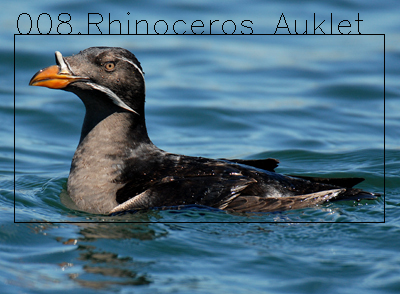

In [7]:
# show image by number including bounding box and class as title
imgNum = 393
pilImage = Image.fromarray(cv2.cvtColor(draw_box(csvData,imgNum),cv2.COLOR_BGR2RGB))
pilImage

In [8]:
# open image in external image viewer
pilImage.show()